# Sympy: un sistema de álgebra computacional

SymPy es un sistema de álgebra computacional (CAS) escrito en Python puro, está desarrollado con un enfoque 
en la extensibilidad y facilidad de uso, tanto a través de aplicaciones interactivas como programáticas. Estas 
características le han permitido a SymPy convertirse en una librería de cómputo simbólico muy popular en 
el ecosistema científico de Python.

En todo este capítulo se asumirá que se ha importado la librería SymPy, con las siguientes instrucciones:


In [1]:
from sympy import *

Adicionalmente dentro del entorno de Jupyter podemos ejecutar la siguiente instrucción que permite *renderizar* las expresiones resultantes.

In [2]:
init_printing()

## Variables simbólicas

Las variables simbólicas son el *alma* de SymPy, todas las operaciones de álgebra simbólica se basan en estas. 
A una variable simbólica se le asigna un símbolo que la representa mediante la función `symbols`:

In [4]:
x = symbols("x")
print(type(x))

<class 'sympy.core.symbol.Symbol'>


Con la función `symbols` se define una nueva variable simbólica que se guarda en `x`, se verifica 
que se crea un objeto de la clase `Symbol`. Con la variable `x` ya definida se puede comenzar 
a formar expresiones algebraicas y manipular matemáticamente.

In [5]:
x + 2

In [6]:
x**2 - 2*x - 10

In [7]:
sqrt(x) - sin(x)

 Puede definir múltiples variables separando por comas cada representación simbólica:

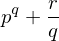

In [8]:
p,q,r = symbols("p,q,r")
p**q + r/q

Además de la forma anterior, también es posible tener variables simbólicas disponibles si se importan 
del módulo `abc` de SymPy:

In [9]:
from sympy.abc import a,b,c,d

In [10]:
(a + b)*(c + d)

## Manipulación algebraica

SymPy es una poderosa herramienta de manipulación y simplificación algebraica, en lo subsiguiente se revisarán 
algunos casos elementales y se describirá el uso de las herramientas (funciones) que proporciona.

En primera instancia se definen algunas variables simbólicas a utilizar:

In [11]:
x,y,z = symbols("x,y,z")
a,b,c,d,k,m,n = symbols("a,b,c,d,k,m,n")

Para las expresiones algebraicas formadas en SymPy por default se *evalúan* y simplifican los términos semejantes. 
Vea los siguientes casos:

In [12]:
x**2 + 5*x**3 - 10*x**2 + 5*x - 10*(x + 1)

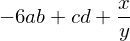

In [13]:
a*b + c*d + x/y - 7*a*b

Naturalmente para simplificaciones y operaciones un poco menos obvias, habrá que especificarle lo que se requiere.

Una de las operaciones elementales de simplificación en álgebra es la factorización, SymPy dispone de la 
función `factor`, la cual toma una expresión algebraica y la factoriza conforme sea posible. 
Por ejemplo, suponiendo que se tiene la expresión $ab + ac$, es sencillo identificar que se puede  
factorizar como $a(b+c)$, SymPy hace lo mismo sin sobresalto alguno.

In [14]:
factor(a*b + a*c)

De igual forma se sabe que una expresión de la forma $ ac + ad + bc + bd $ se puede factorizar como 
$ (a + b) (d + c) $.

In [15]:
factor( a*c + a*d + b*c + b*d )

Así, para un binomio al cuadrado se sabe que, $ (a+b)(a+b) $ es la factorización de una expresión del tipo
$ a^2 + 2ab + b^2 $.


In [16]:
factor(a**2 + 2*a*b + b**2)

¿Se puede hacer el proceso *inverso*, es decir, dados dos factores obtener su expresión *expandida*? 
Por supuesto, para ello se hace uso de la función `expand`. 


In [17]:
expand( (x-7)*(x-3) )

SymPy puede manejar cualquier cantidad de factores y devolver la expresión que resulta de realizar la multiplicación 
algebraica, sin estar limitada siquiera por la cantidad de variables simbólicas.

In [18]:
expand( (x + y)*(x - y) )

In [19]:
expand( (x + y)*(x+y) )

In [20]:
expand( (x + y)**2 )

In [21]:
expand( (x + y)**3 )

In [22]:
expand( a*(m + n)**2 )

De manera general, si requiere simplificar una expresión algebraica SymPy dispone de una función más o menos universal que funcionará en la mayoría de los casos: `simplify`. Por ejemplo, suponiendo que 
se tiene la siguiente expresión algebraica racional y se requiere reducir lo más posible:

$$ \frac{x^2 - 3x}{x^2 + 3x}$$

Se puede notar que tanto en el numerador como en el denominador se puede factorizar $x$, lo cual conduce a:

$$ \frac{x(x - 3)}{x(x + 3)} = \frac{x-3}{x+3} $$

Con SymPy:

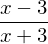

In [25]:
simplify( (x**2 - 3*x)/(x**2 + 3*x) )

Lo mismo para una expresión que involucre funciones trigonométricas, por ejemplo, cualquiera que haya cursado matemáticas 
del nivel secundario, al menos, sabe que $\sin^2 x + \cos^2 x = 1 $, y también *lo sabe* SymPy:

In [26]:
simplify( sin(x)**2 + cos(x)**2 )

Pero también *sabe* que $ \cos x \cos y - \sin x \sin y = \cos(x+y) $.

In [23]:
simplify( cos(x)*cos(y) - sin(x)*sin(y) )

O bien:

In [25]:
simplify( (1+tan(x)**2)/(1+cot(x)**2) )

Habitualmente para la manipulación de expresiones que contienen funciones trigonométricas se suele utilizar 
la función `trigsimp` que en muchos casos lo que devuelva coincidirá con `simplify`. 
Sin embargo, si en lugar de reducir una expresión trigonométrica se requiere expandirla, como 
en el caso del coseno o seno de la suma de dos ángulos, probablemente por intuición se utilizaría `expand`, 
pero aquí no funciona como puede verificar.

In [26]:
expand( sin(x + y) )

En este caso puede utilizar la función `expand_trig`, la cual maneja de mejor manera las manipulaciones trigonométricas:

In [28]:
expand_trig( sin(x+y) )

## Resolviendo ecuaciones e inecuaciones

SymPy dispone de la función `solve`, la cual resuelve desde ecuaciones polinomiales, sistemas de ecuaciones lineales, 
inecuaciones, hasta sistemas de ecuaciones no lineales. La sintaxis de `solve` es polimórfica y en general depende 
de lo que se requiera resolver, tendiendo siempre a que sea posible especificar el mínimo número de parámetros.

En las siguientes subsecciones se describen algunos casos, se asumirá en lo subsiguiente que además de importar SymPy 
se definieron las siguientes variables simbólicas:

In [29]:
x,y,z = symbols("x,y,z")
a,b,c = symbols("a,b,c")

### Ecuaciones polinómicas

La sintaxis más elemental de `solve` es pasando un sólo argumento, el cual se espera sea una expresión algebraica 
y se considera que esta estará igualada a cero. Por ejemplo para resolver la ecuación lineal $ x - 3 = 0 $:

In [30]:
solve( x - 3 )

Para una ecuación cuadrática $ x^2 + 2x + 2 = 0 $: 

In [31]:
solve(x**2 + 2*x + 2)

En este caso la ecuación tiene soluciones complejas, la unidad imaginaria en SymPy se especifica mediante 
el símbolo `I`.

Si se quisiera resolver la ecuación cuadrática en su forma general, por intuición y lo que sabemos hasta ahora, haríamos:

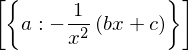

In [32]:
solve(a*x**2 + b*x + c)

Note que el problema está en que al haber más de una variable simbólica, SymPy no sabe con respecto a qué variable debe 
resolver y toma la primera en orden alfabético. Para especificar explícitamente respecto a qué variable resolver, 
se puede indicar mediante un segundo argumento:

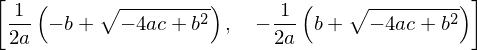

In [39]:
solve(a*x**2 + b*x + c, x)

Puede verificar que devuelve, en efecto, la tan conocida fórmula general.

### Ecuaciones trigonométricas

## Cálculo

### Límites

Para calcular límites matemáticos SymPy dispone de la función `limit`, la cual requiere al menos tres 
argumentos de entrada: la función, variable y valor al que tiende. Por ejemplo, si se quiere calcular 
el siguiente límite:

$$ \lim_{x \to 0} \frac{\sin x}{x} $$

Tendría que teclearse lo siguiente:

In [33]:
limit(sin(x)/x, x, 0)

Para calcular limites laterales debe pasarse un cuarto argumento, por ejemplo:

In [34]:
limit(1/(x-5), x, 5, "-")

In [35]:
limit(1/(x-5), x, 5, "+")

El símbolo `+` denota el cálculo de un límite lateral por la derecha y el símbolo `-` un límite lateral por la izquierda.

### Derivadas

Las derivadas en Python se calculan utilizando la función `diff`, misma que en su forma más simple espera 
al menos dos argumentos: una expresión algebraica y una variable respecto a la cual derivar. Por ejemplo:


In [36]:
diff(exp(x)*cos(x), x)

Es posible también especificar una derivada de orden superior mediante un tercer argumento:

In [37]:
diff(5*x**2 + 3*x - 10, x, 2)

La instrucción anterior calcula la segunda derivada de la función $ f(x) = 5x^2 + 3x - 10 $. 

### Integrales

Para calcular integrales vamos a utilizar la función `integrate`, la cual acepta al menos dos 
argumentos: la función a integrar y la expresión respecto a la cual se integra, por ejemplo:


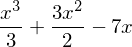

In [38]:
integrate(x**2 + 3*x - 7, x)

Esa instrucción calcula la integral:

$$ \int \left( x^2 + 3x - 7 \, \right) \,\, dx = \frac{x^3}{3} + \frac{3x^2}{2} - 7x + C $$

Note que la expresión algebraica devuelta por Python no contiene la constante de integración, por default SymPy 
no la considera. Sí en algún caso específico necesita referir a la constante de integración puede adicionarla 
manualmente.

Las integrales definidas se pueden calcular si el segundo argumento se hace una tupla de la forma 
`(variable, a, b)`, donde `a` y `b` indican el límite inferior y superior a 
evaluar en la integral:

Por ejemplo, para evaluar:

$$ \int_0^{\pi} \sin x \, dx $$

In [41]:
integrate(sin(x), (x, 0, pi))

O para:

$$ \int_{-5}^{5} z^2 \, dz $$

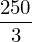

In [43]:
integrate(z**2, (z,-5,5))

## Vectores

Un vector denota una cantidad física que tiene magnitud y orientación en un determinado sistema de referencia. 
En SymPy los vectores se pueden definir mediante la clase `Matrix` del módulo `matrices`, de tal 
manera que en primera instancia haría falta importar dicho módulo, para esto hacemos:

In [44]:
from sympy.matrices import Matrix

Ahora vamos a definir dos vectores $\vec{u}$ y $\vec{v}$:

$$ \vec{u} = \begin{bmatrix} 2 \\ 1 \\ -5 \end{bmatrix} \qquad ; \qquad 
\vec{v} = \begin{bmatrix} 4 \\ -1 \\ 3 \end{bmatrix}
$$


In [46]:
u = Matrix([2,1,-5])
v = Matrix([4,-1,3])

Una suma y resta vectorial se pueden ejecutar sin muchas complicaciones, mediante los operadores 
aritméticos ya conocidos.

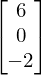

In [47]:
u + v

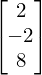

In [48]:
v - u

La magnitud de un vector se puede calcular utilizando el método `norm`.

In [49]:
u.norm()

In [50]:
v.norm()

Recuerde que si requiere ver las expresiones resultantes como fracciones decimales debe usar `evalf`. 

El producto escalar de dos vectores puede calcularlo utilizando el método `dot`, por 
ejemplo $ \vec{u} \cdot \vec{v} $ lo puede especificar como:

In [51]:
u.dot(v)

Para calcular el producto vectorial utilice el método `cross`, por ejemplo 
$ \vec{u} \times \vec{v} $:

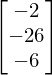

In [52]:
u.cross(v)

Recuerde que el producto vectorial no es conmutativo, por tanto, $\vec{v} \times \vec{u} $ resultará en un vector 
diferente al obtenido anteriormente, como puede verificar enseguida:

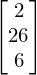

In [53]:
v.cross(u)

## Matrices

Las matrices son arreglos rectangulares de números o cantidades simbólicas. En SymPy, 
se definen utilizando la clase `Matrix`, pasándole como argumentos una lista de 
listas, donde cada sublista corresponde a una fila de la matriz.

Por ejemplo, vamos a definir las matrices $A$, $B$ y $C$, dadas por:

$$ A = \begin{bmatrix}
20 & 50 & 100 \\
10 & 35 & 200 \\
-30 & 20 & 80 
\end{bmatrix}
\qquad
B = \begin{bmatrix}
12 & 26 & 45 \\
3 & -15 & 18 \\
54 & 20 & 0 
\end{bmatrix}
\qquad
C = \begin{bmatrix}
5 & 9 \\
2 & 3 \\
-10 & 8
\end{bmatrix}
 $$

Primero, importamos la clase `Matrix` del módulo `matrices`:

In [54]:
from sympy.matrices import Matrix

Luego escribiríamos:

In [55]:
A = Matrix([[20,50,100], [10,35,200], [-30,20,80]])
B = Matrix([[12,26,45],[3,-15,18],[54,20,0]])
C = Matrix([[5,9], [2,3], [-10,8]])

De manera muy sencilla podríamos realizar operaciones matriciales básicas, por 
ejemplo, una suma:

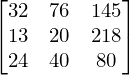

In [56]:
A + B

Naturalmente, y como es esperable, SymPy *conoce* y aplica las reglas de álgebra de matrices, observe:

In [57]:
A + C

ShapeError: Matrix size mismatch: (3, 3) + (3, 2)

SymPy es muy explícito en ese tipo de situaciones y nos imprime un mensaje de error suficientemente descriptivo. 
De igual forma que es válido realizar el producto $AC$, pero no $CA$:

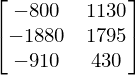

In [58]:
A*C

In [59]:
C*A

ShapeError: Matrix size mismatch: (3, 2) * (3, 3).

El **determinante** de una matriz podemos calcularlo mediante la función `det`:

In [60]:
det(B)

O bien, mediante el propio método `det`:

In [61]:
B.det()

La **matriz inversa** podemos calcularla utilizando el método `inv`:

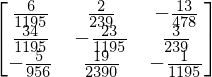

In [62]:
A.inv()

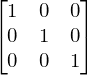

In [63]:
A.inv()*A

La **transpuesta** de una matriz se puede obtener accediendo al atributo `T`

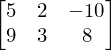

In [64]:
C.T

## Ejercicios

Utilice Python/SymPy para resolver los siguientes ejercicios:

1. Resuelva las siguientes ecuaciones (para la variable $x$):
  1. $ x + 3x = 10 $
  1. $ 2x^2 - 10x + 5 = 0 $
  1. $ \frac{a}{x} + bx - 8 = 0 $
  1. $ \cos x + \sin x = 10 $
  1. $ kx - 10 = x^2 $

1. Calcule las siguientes derivadas:
  1. $ \frac{d}{dx} \left( \cos x \right) $
  1. $ \frac{d}{dt} \left( at^2 - 2\tan t - \frac{10}{t} \right) $
  1. $ \frac{d}{dz} \left( z^5 - 10 e^{-z}  \right) $

1. Calcule las siguientes integrales indefinidas:
  1. $ \int \cos x \, dx $
  1. $ \int \left( x^3 - 8x \right)\, dx $
  1. $ \int \left( e^{-3x} \sin x \right) \, dx $
  1. $ \int \left( s^2 + ks - m \right) \, ds $

1. Calcule las siguientes integrales definidas:
  1. $ \int_{a}^{b} \sin x \, dx $
  1. $ \int_{-10}^{5} x^2 + 10x \, dx $
  1. $ \int_{0}^{2} 10e^{-z} \, dz  $

1. Resuelva la siguiente ecuación diferencial:
$$ \frac{dS}{dr} = kS $$

1. Escriba una función que dados como entrada dos vectores, determine sí estos son 
paralelos.

1. Desarrolle una función llamada `calcula_fuerza_resultante` que reciba como datos de entrada un conjunto de vectores fuerza y devuelva el vector de fuerza resultante.

1. Escriba un función llamada `calcula_momento_resultante` que reciba como datos de entrada un conjunto de 
vectores fuerza y un conjunto de vectores de posición del punto de aplicación de la fuerza con respecto 
a un cierto punto. Se deberá devolver el momento total producido por las fuerzas con respecto al punto.